In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('auto.csv', header = None, index_col=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#Add column names
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine               205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

## Missing Values

In [8]:
#replace ? with NaN
df = df.replace('?', np.NaN)

In [9]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine                0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Those are the ones with missing values: normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price

#### Price

In [10]:
df.dropna(subset=['price'], axis=0, inplace=True)
#remove rows from price missing values
#price is what we want to predict. Any data entry without price data cannot be used for prediction

#### normalized-losses

In [11]:
#Use average value to replace missing values
avg_norm_loss = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

#### bore

In [12]:
avg_bore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, avg_bore, inplace=True)

#### stroke

In [13]:
avg_stroke = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

#### horsepower

In [14]:
avg_horsepower = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### peak-rpm

In [15]:
avg_peakrpm = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

#### number of doors

In [16]:
nan_rows = df[df['num-of-doors'].isnull()]
nan_rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


They are both sedan

In [17]:
df_sedan = df[df['body-style']=='sedan']
df_sedan['num-of-doors'].value_counts()

four    78
two     14
Name: num-of-doors, dtype: int64

In [18]:
78 / (78+14) * 100

84.78260869565217

84,78% sedans is four doors

In [19]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Convert data types

In [22]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine                object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype('float')

In [24]:
df[['normalized-losses']] = df[['normalized-losses']].astype('int')

In [25]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine                object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Bin Horsepower

In [26]:
df['horsepower'] = df['horsepower'].astype('float')
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

In [27]:
df['horsepower-binned'].head(10)

0       Low
1       Low
2    Medium
3       Low
4       Low
5       Low
6       Low
7       Low
8    Medium
9       Low
Name: horsepower-binned, dtype: category
Categories (3, object): [Low < Medium < High]

In [28]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

<BarContainer object of 3 artists>

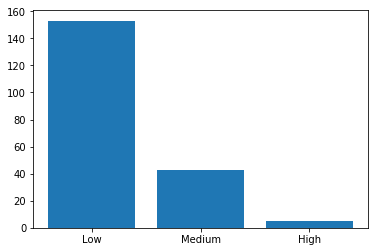

In [29]:
plt.bar(group_names, df['horsepower-binned'].value_counts())

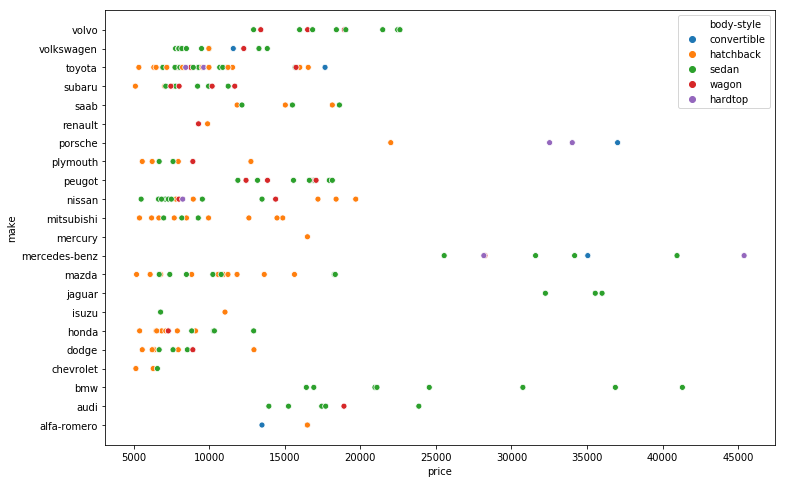

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='make', x='price', data=df, hue='body-style')

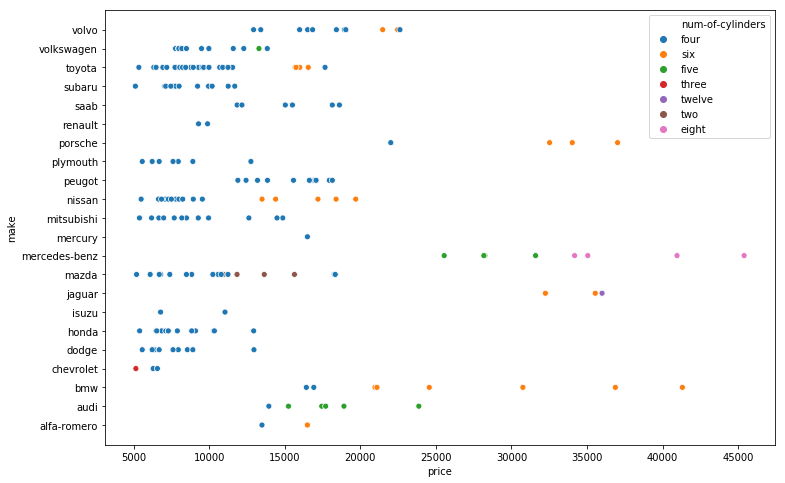

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='make', x='price', data=df, hue='num-of-cylinders')

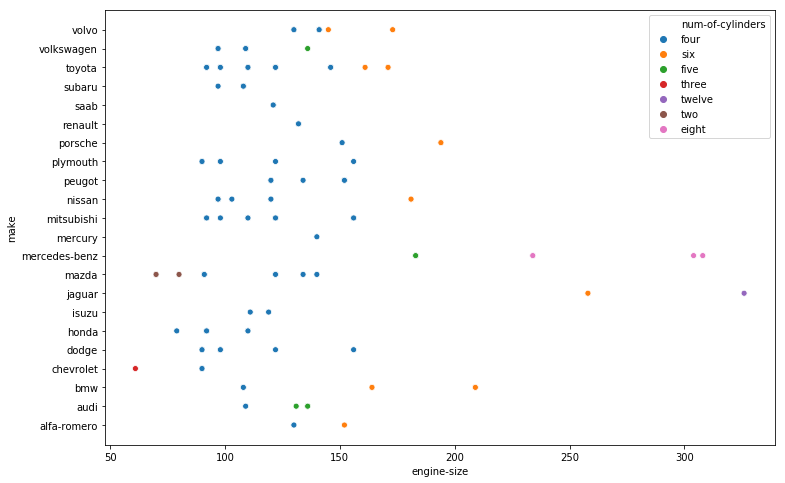

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='make', x='engine-size', data=df, hue='num-of-cylinders')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int32
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine               201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-nu

In [34]:
df[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine', 'engine-type','num-of-cylinders', 'fuel-system']].nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine               2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

In [35]:
label = LabelEncoder()

label_make = label.fit_transform(df.make)
df.make = pd.DataFrame(label_make)

In [36]:
df = pd.get_dummies(df, columns=['fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine', 'engine-type','num-of-cylinders', 'fuel-system'], drop_first=True)

In [37]:
df.head()

,symboling,normalized-losses,make,wheel-base,length,width,height,curb-weight,engine-size,bore,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,122,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,122,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,2,164,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0
